In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import alpha_vantage
from dotenv import load_dotenv
import os
from datetime import datetime, timedelta

In [14]:
# Suppress all future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [15]:
# Define a list of stock symbols
stock_symbols = ["JNJ", "PG", "KO", "MCD", "T"]

In [16]:
# Create a dictionary to store dividend history 
dividend_history = {}

In [17]:
# Fetch dividend history for each stock
for symbol in stock_symbols:
    ticker = yf.Ticker(symbol)
    dividend_history[symbol] = ticker.dividends

In [18]:
# Define the date range for the past 5 years
start_date = datetime.now() - timedelta(days=5*365)
end_date = datetime.now()


In [32]:
# Create a new DataFrame to store the closing prices
df_closing_prices = pd.DataFrame()

# Start fetching data from 2018-01-01
start_date = "2018-01-01"

# End date is today
end_date = datetime.now()

# Fetch the closing prices for all the tickers
for symbol in stock_symbols:
    ticker = yf.Ticker(symbol)
    df_closing_prices[symbol] = ticker.history(start=start_date, end=end_date)['Close']

In [33]:
# Display sample data
df_closing_prices

,JNJ,PG,KO,MCD,T
Date,,,,,
2018-01-02 00:00:00-05:00,119.342995,77.640854,37.955708,151.390381,18.058529
2018-01-03 00:00:00-05:00,120.483002,77.546631,37.872375,150.752380,17.641506
2018-01-04 00:00:00-05:00,120.474434,78.094772,38.405785,151.809875,17.805506
2018-01-05 00:00:00-05:00,121.468735,78.146164,38.397438,152.115799,17.871103
2018-01-08 00:00:00-05:00,121.623024,78.557289,38.339104,152.010910,17.922647
...,...,...,...,...,...
2023-10-04 00:00:00-04:00,155.520004,145.970001,55.040001,255.809998,14.375374
2023-10-05 00:00:00-04:00,157.139999,143.800003,52.380001,252.229996,14.552000
2023-10-06 00:00:00-04:00,157.639999,144.089996,53.139999,248.220001,14.450000


Date
2018-11-26 00:00:00-05:00    0.90
2019-02-25 00:00:00-05:00    0.90
2019-05-24 00:00:00-04:00    0.95
2019-08-26 00:00:00-04:00    0.95
2019-11-25 00:00:00-05:00    0.95
Name: Dividends, dtype: float64

,JNJ,PG,KO,MCD,T
Date,,,,,
2018-10-18 00:00:00-04:00,NaN,0.717,NaN,NaN,NaN
2018-11-26 00:00:00-05:00,0.9,NaN,NaN,NaN,NaN
2018-11-29 00:00:00-05:00,NaN,NaN,0.39,NaN,NaN
2018-11-30 00:00:00-05:00,NaN,NaN,NaN,1.16,NaN
2019-01-09 00:00:00-05:00,NaN,NaN,NaN,NaN,0.51


<Axes: title={'center': 'Dividend History'}, xlabel='Date'>

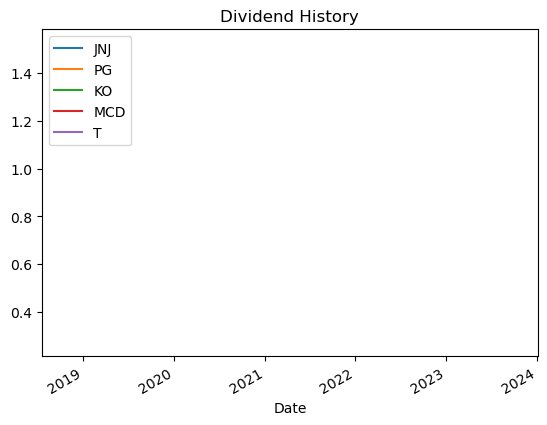

In [26]:
# Fetch dividend history for each stock
for symbol in stock_symbols:
    ticker = yf.Ticker(symbol)
    dividend_history[symbol] = ticker.dividends


    
# Filter data for the past 5 years
for symbol in stock_symbols:
    dividend_history[symbol] = dividend_history[symbol].loc[start_date:end_date]

# Display sample data
display(dividend_history["JNJ"].head())




# Create a new DataFrame from the dictionary of dividends
dividend_df = pd.DataFrame(dividend_history)

# Display the first rows of the DataFrame
display(dividend_df.head())


# Plot the data for each stock
dividend_df.plot(title="Dividend History")


   
    

In [20]:
# Create an empty dictionary to store the stock data
stock_data = {}

In [21]:
# Fetch the stock data for each stock symbol
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    stock_data[symbol] = {
        "Company Name": stock.info.get("longName"),
        "Current Price": stock.history(period="1d")["Close"][0],
        "Dividend Yield": stock.info.get("trailingAnnualDividendYield"),
        "Dividend History": stock.dividends,
    }

In [22]:
# Print the retrieved data for each stock
for symbol, data in stock_data.items():
    print(f"Stock Symbol: {symbol}")
    print(f"Company Name: {data['Company Name']}")
    print(f"Current Price: ${data['Current Price']:.2f}")
    print(f"Dividend Yield: {data['Dividend Yield'] * 100:.2f}%")
    print(f"Dividend History:\n{data['Dividend History']}\n")

Stock Symbol: JNJ
Company Name: Johnson & Johnson
Current Price: $158.36
Dividend Yield: 2.89%
Dividend History:
Series([], Name: Dividends, dtype: float64)

Stock Symbol: PG
Company Name: The Procter & Gamble Company
Current Price: $144.78
Dividend Yield: 2.57%
Dividend History:
Series([], Name: Dividends, dtype: float64)

Stock Symbol: KO
Company Name: The Coca-Cola Company
Current Price: $54.03
Dividend Yield: 3.40%
Dividend History:
Series([], Name: Dividends, dtype: float64)

Stock Symbol: MCD
Company Name: McDonald's Corporation
Current Price: $251.52
Dividend Yield: 2.38%
Dividend History:
Series([], Name: Dividends, dtype: float64)

Stock Symbol: T
Company Name: AT&T Inc.
Current Price: $14.96
Dividend Yield: 7.54%
Dividend History:
Series([], Name: Dividends, dtype: float64)

